In [1]:
# Autoreload extension for Jupyter notebooks
%load_ext autoreload
%autoreload 2

# Manual reload
from importlib import reload

# Magic commands for inline plotting and high-res figures
%matplotlib inline
%config InlineBackend.figure_format ='retina'

# Standard library imports
import os
import sys
import pickle

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pandas and plotting configurations
pd.set_option('display.max_rows', 1000)
idx = pd.IndexSlice

# Figure formatting
import rsmf
FIG_FORMATTER: rsmf.abstract_formatter.AbstractFormatter = rsmf.setup(
    r"\documentclass[a4paper,twocolumn,10pt,unpublished]{quantumarticle}"
)
COLORS = plt.get_cmap('tab10')
plt.rcParams.update({
    "axes.prop_cycle": plt.cycler("color", plt.cm.tab10.colors),
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "figure.constrained_layout.use": True,
    "figure.constrained_layout.h_pad": 0.04,
    "figure.constrained_layout.w_pad": 0.04,
    "figure.constrained_layout.hspace": 0.01,
    "figure.constrained_layout.wspace": 0.01,
    "legend.framealpha": 0.5,
})

# For in-line display of rsmf figures
import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
matplotlib.use('module://matplotlib_inline.backend_inline')

# Utility functions
def write_pickle(path, obj):
    with open(path, 'wb') as f:
        pickle.dump(obj, f)

def read_pickle(path):
    with open(path, 'rb') as f:
        obj = pickle.load(f)
    return obj

from simulations.analysis.plotting_helpers import (
    error_band_plot, load_data
)

## Post-selection after finishing

In [3]:
df_ps_dict = load_data("surface_sliding_window")

In [4]:
list(df_ps_dict.keys())

['committed_cluster_llr_norm_frac_2']

In [6]:
df_ps = df_ps_dict["committed_cluster_llr_norm_frac_2"]
df_ps.loc[(13, 13, 0.005, 3, 1)].head()

,p_fail,delta_p_fail,p_abort,delta_p_abort,count,num_fails,p_fail_conv,delta_p_fail_conv,p_abort_conv,delta_p_abort_conv,count_conv,num_fails_conv
committed_cluster_llr_norm_frac,,,,,,,,,,,,
0.0006,0.033791,0.033791,0.999995,0.000001,53,0,NaN,NaN,NaN,NaN,NaN,NaN
0.0007,0.000478,0.000478,0.999598,0.000012,4018,0,NaN,NaN,NaN,NaN,NaN,NaN
0.0008,0.000017,0.000017,0.988829,0.000065,111704,0,NaN,NaN,NaN,NaN,NaN,NaN
0.0009,0.000002,0.000002,0.909833,0.000178,901668,0,NaN,NaN,NaN,NaN,NaN,NaN
0.0010,0.000008,0.000003,0.748641,0.000269,2513591,19,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_ps_ordinary = load_data("surface_old")["cluster_llr_norm_frac_2"]

df_ps_ordinary.head()

p_fail  delta_p_fail   p_abort  \
d T p     cluster_llr_norm_frac                                         
3 3 0.001 0.0000                 1.966989e-07  8.859556e-08  0.088926   
          0.0156                 1.270537e-05  7.289860e-07  0.082340   
          0.0158                 3.425003e-05  1.193226e-06  0.076228   
          0.0160                 3.384925e-05  1.175555e-06  0.059382   
          0.0161                 5.913363e-05  1.545026e-06  0.048609   

                                 delta_p_abort     count  num_fails  \
d T p     cluster_llr_norm_frac                                       
3 3 0.001 0.0000                      0.000056  91107406         16   
          0.0156                      0.000054  91765975       1164   
          0.0158                      0.000052  92377172       3162   
          0.0160                      0.000046  94061784       3182   
          0.0161                      0.000042  95139104       5624   

                                 p_fail_conv  delta_p_fail_conv  p_abort_conv  \
d T p     cluster_llr_norm_frac                                                 
3 3 0.001 0.0000                    0.000375           0.000004      0.000287   
          0.0156                    0.000375           0.000004      0.000287   
          0.0158                    0.000375           0.000004      0.000287   
          0.0160                    0.000375           0.000004      0.000287   
          0.0161                    0.000375           0.000004      0.000287   

                                 delta_p_abort_conv  count_conv  \
d T p     cluster_llr_norm_frac                                   
3 3 0.001 0.0000                           0.000003  99971338.0   
          0.0156                           0.000003  99971338.0   
          0.0158                           0.000003  99971338.0   
          0.0160                           0.000003  99971338.0   
          0.0161                           0.000003  99971338.0   

                                 num_fails_conv  
d T p     cluster_llr_norm_frac                  
3 3 0.001 0.0000                          37457  
          0.0156                          37457  
          0.0158                          37457  
          0.0160                          37457  
          0.0161                          37457

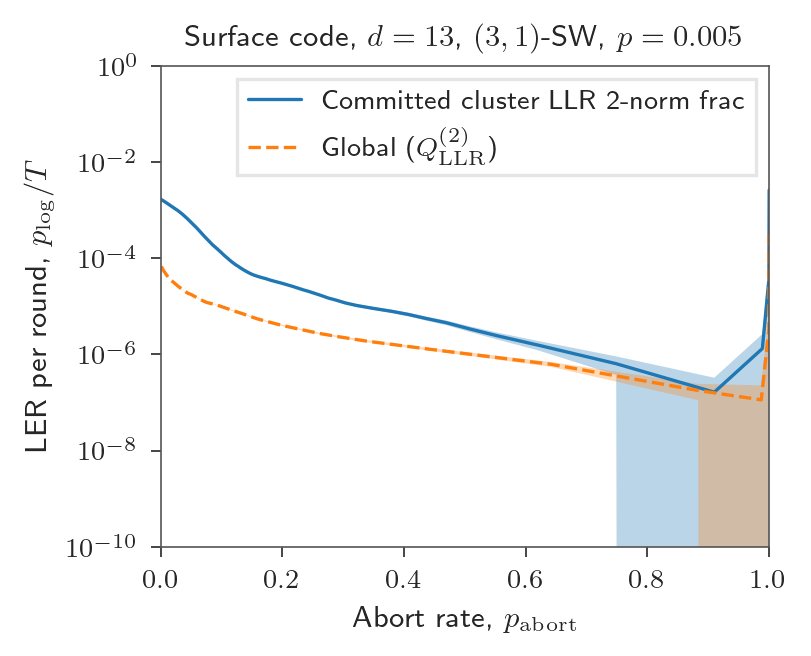

In [22]:
fig = FIG_FORMATTER.figure(aspect_ratio=0.8)
ax = fig.add_subplot()
d, T, p, W, F = prms = (13, 13, 0.005, 3, 1)
labels = {
    "committed_cluster_llr_norm_frac_2": r"Committed cluster LLR 2-norm frac",
}
for by in df_ps_dict.keys():
    if by not in labels:
        continue
    df_ps = df_ps_dict[by].loc[prms]
    error_band_plot(
        df_ps["p_abort"],
        df_ps["p_fail"] / T,
        df_ps["delta_p_fail"] / T,
        ax=ax,
        label=labels[by],
    )

df_ps_ordinary_sng = df_ps_ordinary.loc[(d, T, p)]
error_band_plot(
    df_ps_ordinary_sng["p_abort"],
    df_ps_ordinary_sng["p_fail"] / T,
    df_ps_ordinary_sng["delta_p_fail"] / T,
    ax=ax,
    linestyle="--",
    label=r"Global ($Q_\mathrm{LLR}^{(2)}$)",
)

ax.set_yscale("log")
ax.set_xlim(0, 1)
ax.set_ylim(1e-10, 1)

ax.set_xlabel("Abort rate, $p_\mathrm{abort}$")
ax.set_ylabel("LER per round, $p_\mathrm{log}/T$")
ax.set_title(rf"Surface code, $d={d}$, $(3,1)$-SW, $p={p:.3f}$", fontsize=9)

ax.legend(fontsize=8)

# fig.savefig("overleaf_figs/sliding_window_bb_code_ler_vs_abort_rate.pdf")

(0.0001, 0.1)

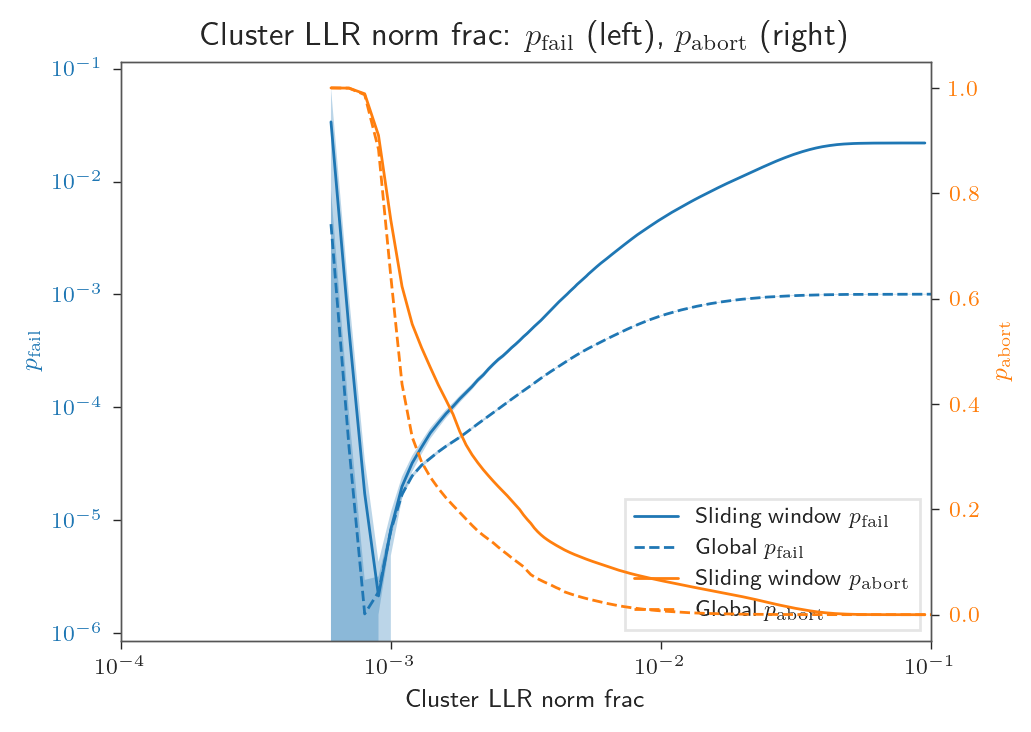

In [11]:
import matplotlib.pyplot as plt
import pandas as pd


def plot_cluster_llr_norm_frac_dual_axis(
    df_ps: pd.DataFrame,
    df_ps_ordinary: pd.DataFrame,
    prms: tuple,
    label_main: str = r"Sliding window",
    label_ordinary: str = r"Single shot",
    color_pfail: str = "tab:blue",
    color_pabort: str = "tab:orange",
    xlim: tuple = (0, 0.1),
) -> None:
    """
    Plot p_fail and p_abort for cluster_llr_norm_frac using dual y-axes.

    This function plots the logical error rate (p_fail) and abort rate (p_abort) for the
    cluster_llr_norm_frac metric, comparing sliding window and single shot (ordinary) results.
    The sliding window data is selected using a 5-tuple (n, T, p, W, F), while the ordinary
    data is selected using a 3-tuple (n, T, p).

    Parameters
    ----------
    df_ps : pandas DataFrame
        DataFrame for sliding window results, indexed by (n, T, p, W, F).
    df_ps_ordinary : pandas DataFrame
        DataFrame for ordinary (single shot) results, indexed by (n, T, p).
    prms : tuple
        Parameter tuple (n, T, p, W, F) for selecting the sliding window data.
    by : str
        Metric key for cluster_llr_norm_frac.
    label_main : str
        Label for the sliding window curve.
    label_ordinary : str
        Label for the single shot curve.
    color_pfail : str
        Color for the p_fail curve.
    color_pabort : str
        Color for the p_abort curve.

    Returns
    -------
    None
        The function creates and displays a matplotlib plot.
    """
    # Prepare data for sliding window (5-tuple index)
    df_ps_sel = df_ps.loc[prms].reset_index()
    x_sw = df_ps_sel["committed_cluster_llr_norm_frac"]
    y_pfail_sw = df_ps_sel["p_fail"]
    delta_y_pfail_sw = df_ps_sel["delta_p_fail"]
    y_pabort_sw = df_ps_sel["p_abort"]

    # Prepare data for ordinary (single shot) (3-tuple index)
    d, T, p, _, _ = prms
    df_ps_ordinary_sng = df_ps_ordinary.loc[(d, T, p)].reset_index()
    x_ord = df_ps_ordinary_sng["cluster_llr_norm_frac"]
    y_pfail_ord = df_ps_ordinary_sng["p_fail"]
    delta_y_pfail_ord = df_ps_ordinary_sng["delta_p_fail"]
    y_pabort_ord = df_ps_ordinary_sng["p_abort"]

    fig, ax1 = plt.subplots(figsize=(5, 3.5))

    # Left y-axis: p_fail
    l1 = error_band_plot(
        x_sw,
        y_pfail_sw,
        delta_y_pfail_sw,
        label=f"{label_main} $p_{{\\mathrm{{fail}}}}$",
        color=color_pfail,
    )

    l2 = error_band_plot(
        x_ord,
        y_pfail_ord,
        delta_y_pfail_ord,
        linestyle="--",
        label=f"{label_ordinary} $p_{{\\mathrm{{fail}}}}$",
        color=color_pfail,
    )
    ax1.set_ylabel(r"$p_\mathrm{fail}$", color=color_pfail)
    ax1.set_xlabel(r"Cluster LLR norm frac")
    ax1.set_yscale("log")
    ax1.tick_params(axis="y", labelcolor=color_pfail)

    # Right y-axis: p_abort
    ax2 = ax1.twinx()
    l3 = ax2.plot(
        x_sw,
        y_pabort_sw,
        label=f"{label_main} $p_{{\\mathrm{{abort}}}}$",
        color=color_pabort,
        linestyle="-",
    )
    l4 = ax2.plot(
        x_ord,
        y_pabort_ord,
        "--",
        label=f"{label_ordinary} $p_{{\\mathrm{{abort}}}}$",
        color=color_pabort,
    )
    ax2.set_ylabel(r"$p_\mathrm{abort}$", color=color_pabort)
    ax2.tick_params(axis="y", labelcolor=color_pabort)

    # Legend
    lines = l1 + l2 + l3 + l4
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc="best", fontsize=8)

    ax1.set_title(
        "Cluster LLR norm frac: $p_\\mathrm{fail}$ (left), $p_\\mathrm{abort}$ (right)"
    )

    ax1.set_xlim(xlim)


plot_cluster_llr_norm_frac_dual_axis(
    df_ps=df_ps_dict["committed_cluster_llr_norm_frac_2"],
    df_ps_ordinary=df_ps_ordinary,
    prms=(13, 13, 0.005, 3, 1),
    label_main="Sliding window",
    label_ordinary="Global",
)

plt.xscale("log")
plt.xlim(1e-4, 0.1)

## Real-time post-selection analysis

In [14]:
from simulations.analysis.data_collectors.data_collection import DATA_DIR

prms_list = [(13, 13, 0.003, 5, 1), (13, 13, 0.005, 5, 1)]
dfs_rtps_all = {}
data_ordinary = {}
for prms in prms_list:
    d, T, p, W, F = prms
    data_dir = os.path.join(
        DATA_DIR, "real_time_post_selection/surface", f"d{d}_T{T}_p{p}_W{W}_F{F}"
    )
    fnames = sorted(os.listdir(data_dir))
    dfs_rtps = {}
    keys = ["cutoffs", "p_fail", "delta_p_fail", "effective_avg_trials", "p_abort"]
    for fname in fnames:
        with open(os.path.join(data_dir, fname), "rb") as f:
            df = pickle.load(f)

        if "ordinary" in fname:
            data_ordinary[prms] = df

        else:
            config = fname.split(".")[0]
            df_data = pd.DataFrame({key: df[key] for key in keys})
            dfs_rtps[config] = df_data
    dfs_rtps_all[prms] = dfs_rtps

In [11]:
with open(os.path.join(data_dir, fnames[0]), "rb") as f:
    df = pickle.load(f)
    print(list(df.keys()))

['p_fail', 'delta_p_fail', 'p_abort', 'effective_avg_trials', 'num_accepted', 'num_failed_accepted', 'cutoffs', 'total_samples']


In [15]:
data_ordinary

{(13, 13, 0.003, 5, 1): {'p_fail': 0.0004036294433144019,
  'delta_p_fail': 2.5681223778445048e-06,
  'total_samples': 235000000,
  'num_failed': np.int64(94851)},
 (13, 13, 0.005, 5, 1): {'p_fail': 0.005379990006240029,
  'delta_p_fail': 4.533812174881656e-05,
  'total_samples': 10000000,
  'num_failed': np.int64(53798)}}

In [13]:
df_ps = load_data("surface_old")["cluster_llr_norm_frac_2"]

df_ps.head()

p_fail  delta_p_fail   p_abort  \
d T p     cluster_llr_norm_frac                                         
3 3 0.001 0.0000                 1.966989e-07  8.859556e-08  0.088926   
          0.0156                 1.270537e-05  7.289860e-07  0.082340   
          0.0158                 3.425003e-05  1.193226e-06  0.076228   
          0.0160                 3.384925e-05  1.175555e-06  0.059382   
          0.0161                 5.913363e-05  1.545026e-06  0.048609   

                                 delta_p_abort     count  num_fails  \
d T p     cluster_llr_norm_frac                                       
3 3 0.001 0.0000                      0.000056  91107406         16   
          0.0156                      0.000054  91765975       1164   
          0.0158                      0.000052  92377172       3162   
          0.0160                      0.000046  94061784       3182   
          0.0161                      0.000042  95139104       5624   

                                 p_fail_conv  delta_p_fail_conv  p_abort_conv  \
d T p     cluster_llr_norm_frac                                                 
3 3 0.001 0.0000                    0.000375           0.000004      0.000287   
          0.0156                    0.000375           0.000004      0.000287   
          0.0158                    0.000375           0.000004      0.000287   
          0.0160                    0.000375           0.000004      0.000287   
          0.0161                    0.000375           0.000004      0.000287   

                                 delta_p_abort_conv  count_conv  \
d T p     cluster_llr_norm_frac                                   
3 3 0.001 0.0000                           0.000003  99971338.0   
          0.0156                           0.000003  99971338.0   
          0.0158                           0.000003  99971338.0   
          0.0160                           0.000003  99971338.0   
          0.0161                           0.000003  99971338.0   

                                 num_fails_conv  
d T p     cluster_llr_norm_frac                  
3 3 0.001 0.0000                          37457  
          0.0156                          37457  
          0.0158                          37457  
          0.0160                          37457  
          0.0161                          37457

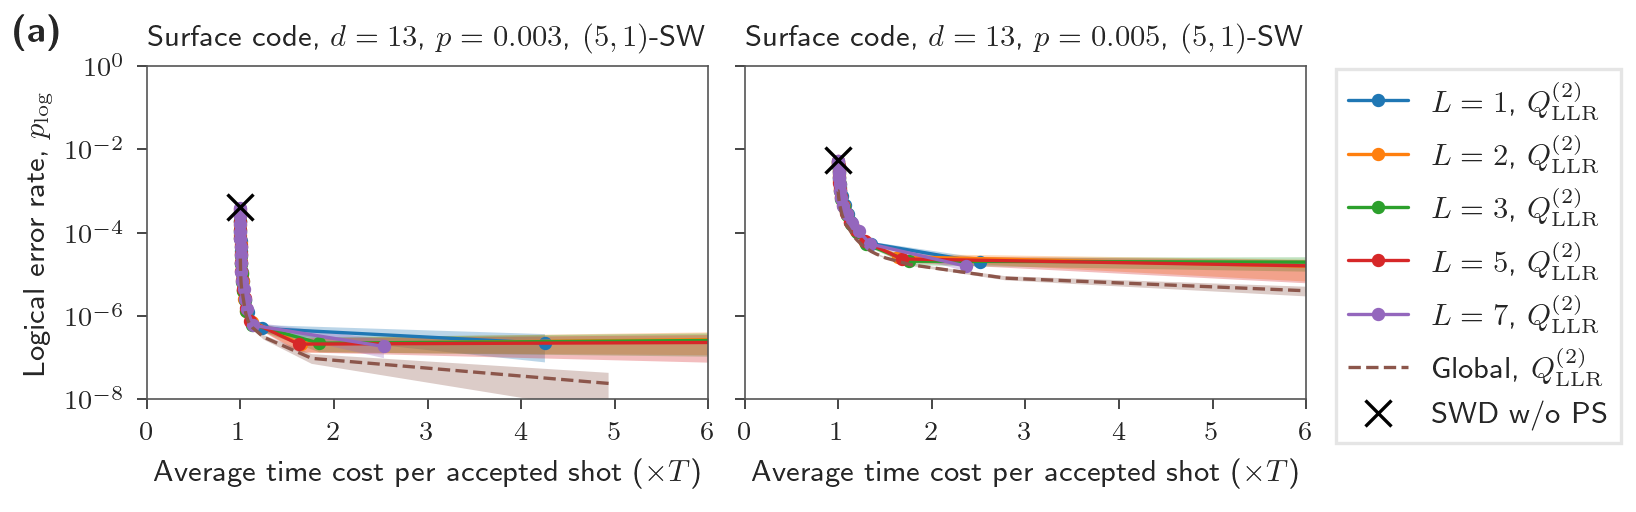

In [18]:
fig = FIG_FORMATTER.figure(wide=True, aspect_ratio=0.3)
axes = fig.subplots(ncols=2, sharey=True)

tol = 1

Ls = [1, 2, 3, 5, 7]

for i_ax, (prms, dfs_rtps) in enumerate(dfs_rtps_all.items()):
    d, T, p, W, F = prms
    ax = axes[i_ax]
    for config, df in dfs_rtps.items():
        mask = df["delta_p_fail"] / df["p_fail"] < tol
        df_masked = df[mask]

        parts = config.split("_")
        L = int(parts[0][2:])  # Extract number after 'mw'
        order = int(parts[-1])  # Extract last number
        label = rf"$L={L}$, $Q_\mathrm{{LLR}}^{{({order})}}$"

        error_band_plot(
            df_masked["effective_avg_trials"],
            df_masked["p_fail"],
            df_masked["delta_p_fail"],
            ax=ax,
            marker="o",
            label=label if i_ax == 0 else None,
            color=COLORS(Ls.index(L)),
        )

    df_ps_masked = df_ps.loc[(d, T, p)]
    df_ps_masked = df_ps_masked[
        df_ps_masked["delta_p_fail"] / df_ps_masked["p_fail"] < tol
    ]

    error_band_plot(
        1 / (1 - df_ps_masked["p_abort"]),
        df_ps_masked["p_fail"],
        df_ps_masked["delta_p_fail"],
        ax=ax,
        label=r"Global, $Q_\mathrm{LLR}^{(2)}$" if i_ax == 0 else None,
        linestyle="--",
        color=COLORS(len(Ls)),
    )

    # Add 'X' mark for ordinary data
    ax.plot(
        1,
        data_ordinary[prms]['p_fail'],
        marker='x',
        markersize=8,
        color='black',
        label='SWD w/o PS' if i_ax == 0 else None,
        linestyle='none',
        zorder=10
    )

    ax.set_yscale("log")

    ax.set_title(rf"Surface code, $d={d}$, $p = {p}$, $({W}, {F})$-SW", fontsize=9)
    ax.set_xlabel(r"Average time cost per accepted shot ($\times T$)")
    if i_ax == 0:
        ax.set_ylabel(r"Logical error rate, $p_\mathrm{log}$")

    ax.set_xticks(np.arange(0, 17))
    ax.set_xlim(0, 6)
    ax.set_ylim(1e-8, 1)

fig.legend(loc="outside right")

fig.text(
    0,
    1,
    r"\textbf{(a)}",
    fontsize=11,
    in_layout=False,
    transform=fig.transFigure,
    verticalalignment="top",
)

fig.savefig("figs/surface_code_sliding_window_analysis.pdf")

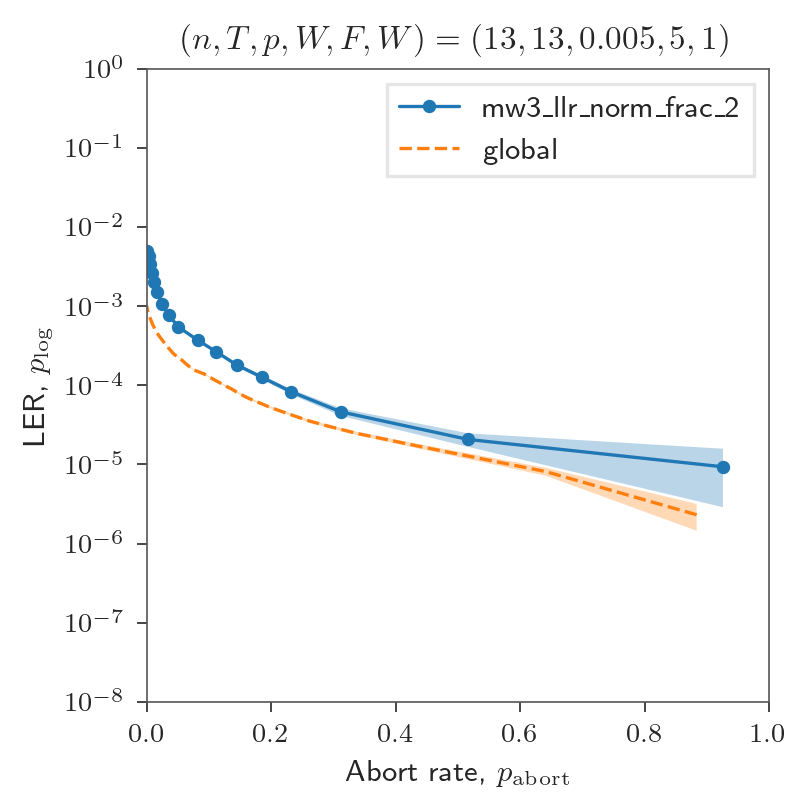

In [31]:
fig = FIG_FORMATTER.figure(aspect_ratio=1)
ax = fig.add_subplot()

tol = 0.7

for config, df in dfs_rtps.items():
    mask = df["delta_p_fail"] / df["p_fail"] < tol
    df_masked = df[mask]

    error_band_plot(
        df_masked["p_abort"],
        df_masked["p_fail"],
        df_masked["delta_p_fail"],
        ax=ax,
        marker="o",
        label=config,
    )

df_ps_masked = df_ps.loc[(d, T, p)]
df_ps_masked = df_ps_masked[df_ps_masked["delta_p_fail"] / df_ps_masked["p_fail"] < tol]

error_band_plot(
    df_ps_masked["p_abort"],
    df_ps_masked["p_fail"],
    df_ps_masked["delta_p_fail"],
    ax=ax,
    label="global",
    linestyle="--",
)

ax.set_yscale("log")

ax.set_title(rf"$(n, T, p, W, F, W) = ({d}, {T}, {p}, {W}, {F})$", fontsize=10)
ax.set_xlabel(r"Abort rate, $p_\mathrm{abort}$")
ax.set_ylabel(r"LER, $p_\mathrm{log}$")

ax.set_xlim(0, 1)
ax.set_ylim(1e-8, 1)

ax.legend()

(0.001, 0.1)

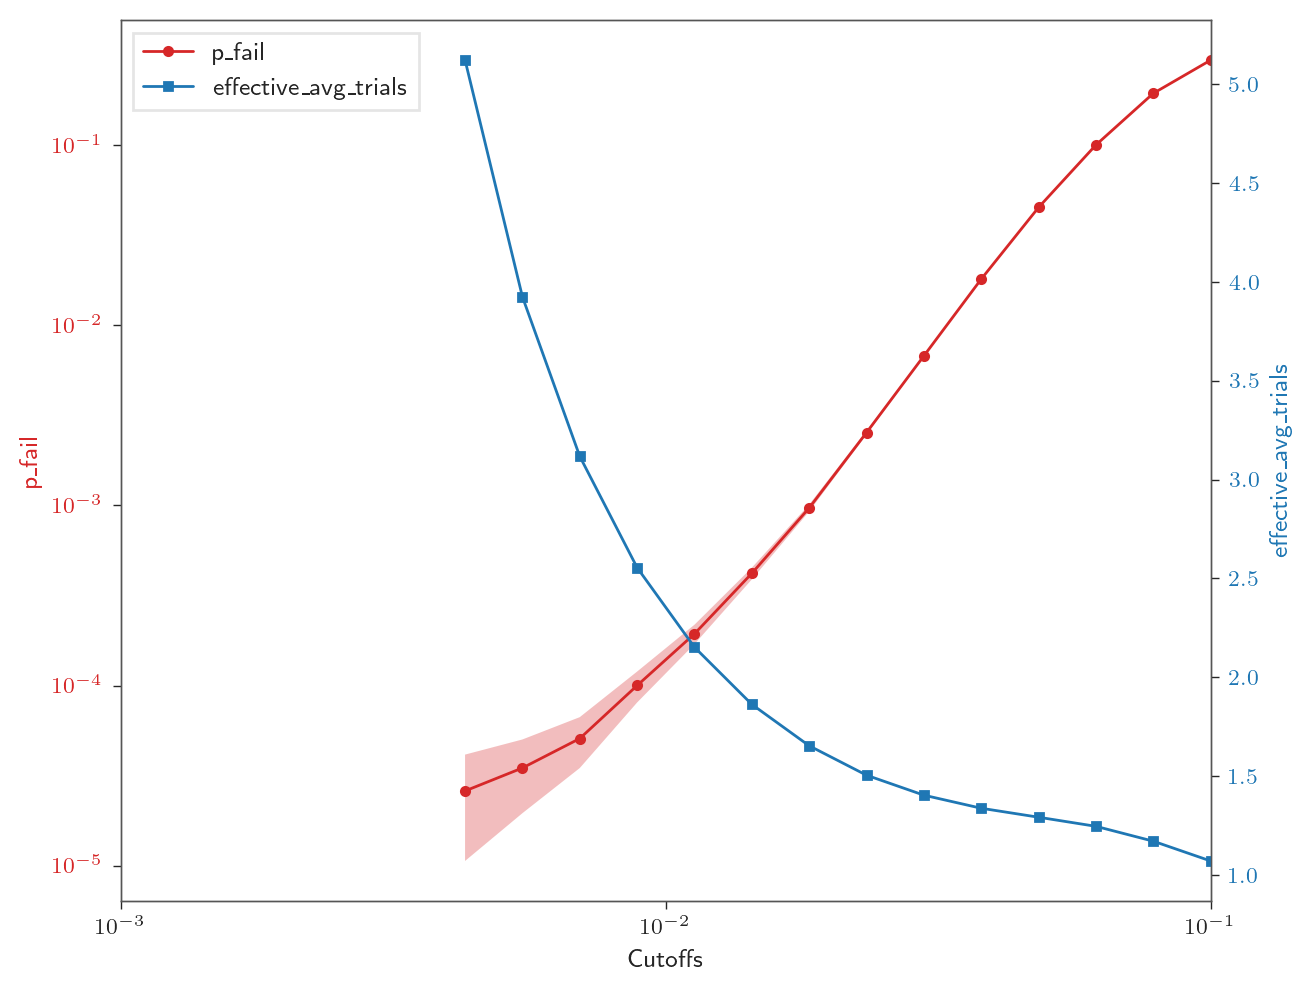

In [ ]:
fig, ax1 = plt.subplots()

mask = dfs_rtps["delta_p_fail"] / dfs_rtps["p_fail"] < 0.7
cutoffs = dfs_rtps["cutoffs"][mask]
p_fail = dfs_rtps["p_fail"][mask]
delta_p_fail = dfs_rtps["delta_p_fail"][mask]
effective_avg_trials = dfs_rtps["effective_avg_trials"][mask]

# Plot p_fail on left y-axis
color1 = "tab:red"
ax1.set_xlabel("Cutoffs")
ax1.set_ylabel("p_fail", color=color1)
line1 = error_band_plot(
    cutoffs,
    p_fail,
    delta_p_fail,
    color=color1,
    marker="o",
    label="p_fail",
)
ax1.tick_params(axis="y", labelcolor=color1)
ax1.set_xscale("log")
ax1.set_yscale("log")

# Create second y-axis for effective_avg_trials
ax2 = ax1.twinx()
color2 = "tab:blue"
ax2.set_ylabel("effective_avg_trials", color=color2)
line2 = ax2.plot(
    cutoffs,
    effective_avg_trials,
    color=color2,
    marker="s",
    label="effective_avg_trials",
)
ax2.tick_params(axis="y", labelcolor=color2)

# Add legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="best")

ax1.set_xlim(1e-3, 0.1)